### 📊 **Principal Component Analysis (PCA)**

Principal Component Analysis (PCA) is a fundamental dimensionality reduction technique. It aims to reduce the dimensionality of a dataset while retaining as much variance (information) as possible.


**Data Representation as a Matrix**
- Data is represented as a matrix $ A \in \mathbb{R}^{n \times d} $, where each row represents a data point, and each column represents a feature:
  $$
  A =
  \begin{bmatrix}
  A^{(1)} \\
  A^{(2)} \\
  \vdots \\
  A^{(n)}
  \end{bmatrix}
  $$

- Each row vector $ A^{(i)} $ corresponds to a point in $ \mathbb{R}^d $.

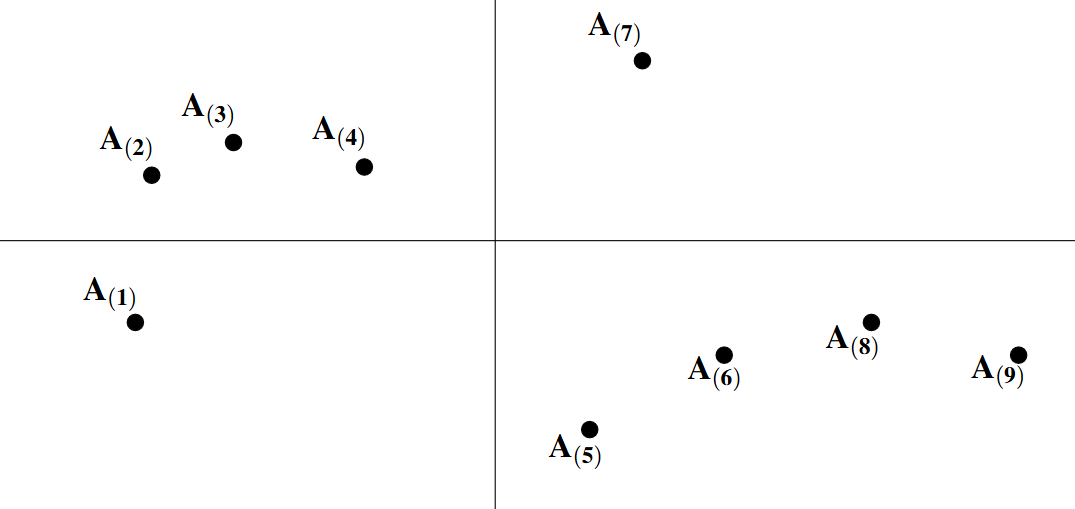



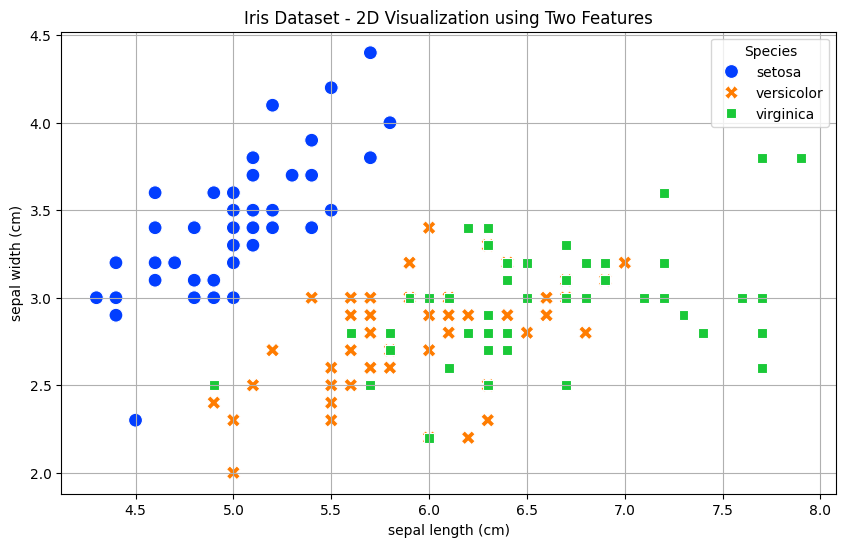

In [72]:
from sklearn.datasets import load_iris
import seaborn as sns
# Load dataset
iris = load_iris()
data = iris.data[:, :4] 
target = iris.target
target_names = iris.target_names
labels = iris.target  # Class labels
feature_names = iris.feature_names

import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'}) # map target to species name

# Select two features for 2D visualization
feature_x = 'sepal length (cm)'
feature_y = 'sepal width (cm)'

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=feature_x, y=feature_y, hue='species', style='species', s=100, palette='bright')
plt.title('Iris Dataset - 2D Visualization using Two Features')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend(title='Species')
plt.grid(True)
plt.show()

# We have 4 feature in total, we can see that even if we choose 2 out of 4 that may be the most representative, we still can't separate the species perfectly.

**Step 1: Data Preprocessing**
1. **Centering the Data:** Subtract the mean from each data point to center the data around the origin:
   $$
   A(i) = A(i) - \frac{1}{n} \sum_{j=1}^{n} A(j)
   $$

2. **Normalization:** Scale each feature to have unit variance:
   $$
   A(j) = \frac{A(j)}{\sqrt{\sum_{i=1}^{n} A_{i,j}^2}}
   $$

In [74]:
import numpy as np
# Manual Standardization
mean = np.mean(data, axis=0)  # Calculate mean for each feature
std = np.std(data, axis=0)    # Calculate standard deviation for each feature
data_std = (data - mean) / std # Standardize the data
centered_data = data_std - np.mean(data_std, axis=0) # Centering the data

### **Step 2: Variance and Projection**
Variance along a direction $ v $ is defined as:
$$
Var_v[A] = \frac{1}{n} \sum_{i=1}^{n} \left( A^{(i)} v \right)^2
$$

We aim to maximize the variance in a particular direction:
$$
\max_{v \in \mathbb{R}^d, \|v\|=1} Var_v[A]
$$

This leads to the **spectral norm** of matrix \( A \):
$$
\|A\|_2 = \max_{\|v\|=1} \|A v\| = \sigma_1
$$
Where:
- $ \sigma_1 $ is the largest singular value of $A$.

---

### **Step 3: Singular Value Decomposition (SVD)**
The **Singular Value Decomposition (SVD)** expresses the matrix \( A \) as:
$$
A = U \Sigma V^T
$$
Where:
- $ U$: Orthonormal matrix of left singular vectors.
- $ \Sigma$: Diagonal matrix of singular values $( \sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_r )$.
-$ V $: Orthonormal matrix of right singular vectors.

The reduced representation using the first $k$ components:
$$
A_k = \sum_{j=1}^{k} \sigma_j u_j v_j^T
$$

- $ A_k $ retains the maximum variance of the data in a $ k $-dimensional subspace.

In [76]:
# Step 3: Compute Covariance Matrix
cov_matrix = np.cov(data.T)
print("Covariance Matrix:\n")
display(cov_matrix)

# Step 4: Perform Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(data)
print("\nSingular Values (S):", S) # data representation in the principal component space
print("\nLeft Singular Vectors (U):\n", U) # variance explained by each principal component
print("\nRight Singular Vectors (Vt):\n", Vt) # principal directions

Covariance Matrix:



array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])


Singular Values (S): [95.95991387 17.76103366  3.46093093  1.88482631]

Left Singular Vectors (U):
 [[-0.06161685  0.12961144  0.0021386  ... -0.09343429 -0.09573864
  -0.08085465]
 [-0.05807094  0.11101978  0.07067239 ...  0.03690405 -0.03153954
   0.01309526]
 [-0.05676305  0.11796647  0.00434255 ...  0.03066199  0.19531473
   0.13569909]
 ...
 [-0.0940593  -0.0498297  -0.04144001 ...  0.98181631 -0.02194514
  -0.00894446]
 [-0.09488961 -0.05610123 -0.21297821 ... -0.02155617  0.94178018
  -0.02971961]
 [-0.08847836 -0.0515697  -0.09575285 ... -0.0086052  -0.03021088
   0.9736599 ]]

Right Singular Vectors (Vt):
 [[-0.75110816 -0.38008617 -0.51300886 -0.16790754]
 [ 0.2841749   0.5467445  -0.70866455 -0.34367081]
 [ 0.50215472 -0.67524332 -0.05916621 -0.53701625]
 [ 0.32081425 -0.31725607 -0.48074507  0.75187165]]


## **3. Best-Fit Subspace**
PCA projects data onto a $k$ -dimensional subspace defined by the top $k$  singular vectors $ v_1, v_2, \ldots, v_k $. This minimizes reconstruction error and maximizes variance:
$$
\|A V_k\|_F^2 \geq \|A W_k\|_F^2
$$

Where:
- $ V_k $: Top $k$ singular vectors.
- $ W_k $: Any other set of $k$ orthonormal vectors.
## **4. Dimensionality Reduction**
PCA reduces the dimensionality of data while preserving key structural information. The reduced dataset is represented as:
$$
A V_k
$$

- The points are projected into a new coordinate system defined by the top $k$ principal components.



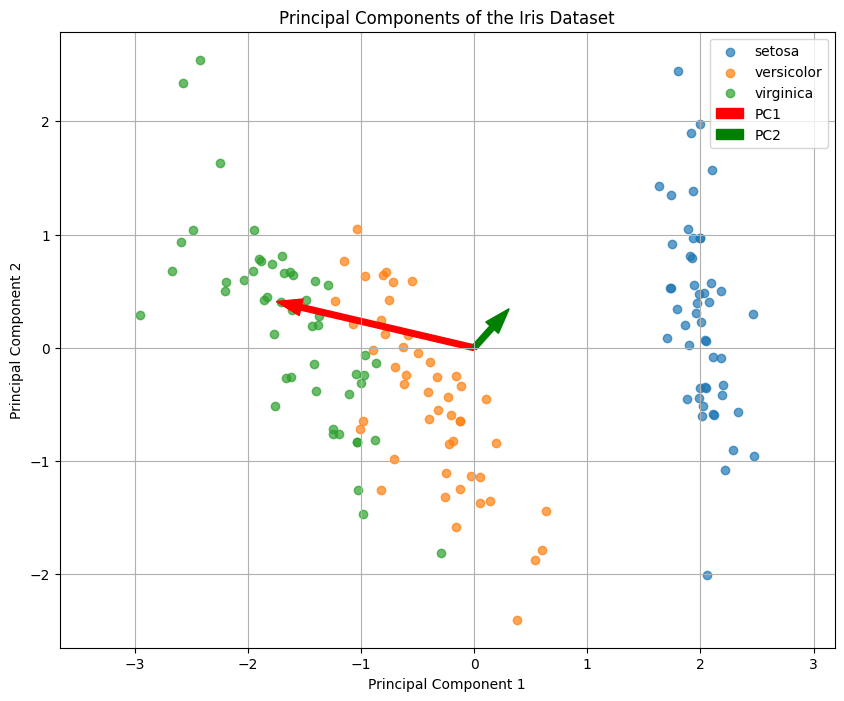

In [78]:
# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix) # eigh is used for symmetric matrices, it returns eigenvalues
idx = eigenvalues.argsort()[::-1] # Sort eigenvalues in descending order
eigenvalues = eigenvalues[idx] # Reorder eigenvalues based on the sorted index
eigenvectors = eigenvectors[:, idx] # Reorder eigenvectors  accordingly

# Project Data onto First Two Principal Components
W = eigenvectors[:, :2]  # Select the first two eigenvectors
projected_data = centered_data @ W # Project the data onto the first two eigenvectors

# Plotting Principal Components
origin = np.mean(projected_data, axis=0)  # Origin for PCA arrows

# Plot data points
plt.figure(figsize=(10, 8))
for i, species in enumerate(target_names):
    plt.scatter(projected_data[target == i, 0], 
                projected_data[target == i, 1], 
                label=species, alpha=0.7)

# Plot principal component arrows
for i in range(2):
    plt.arrow(origin[0], origin[1], 
              W[0, i] * eigenvalues[i], W[1, i] * eigenvalues[i],
              color='r' if i == 0 else 'g', 
              width=0.05, label=f'PC{i+1}')

plt.title('Principal Components of the Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


These two dimensions (PC1 and PC2) are the new coordinate system where:

- PC1 (Red Arrow): It's the direction in which the data has the maximum variance. Data points are most spread out along this direction.
- PC2 (Green Arrow): Captures the second-largest variance, orthogonal to PC1.


In [82]:
# Explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("\nExplained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# 2 principal components explain 95.8% of the variance in the data, which is a good representation of the original data.


Explained Variance Ratio:
PC1: 0.9246
PC2: 0.0531
PC3: 0.0171
PC4: 0.0052


This plot visually represents how the Iris dataset is projected onto the first principal component (PC1) after applying Principal Component Analysis (PCA)

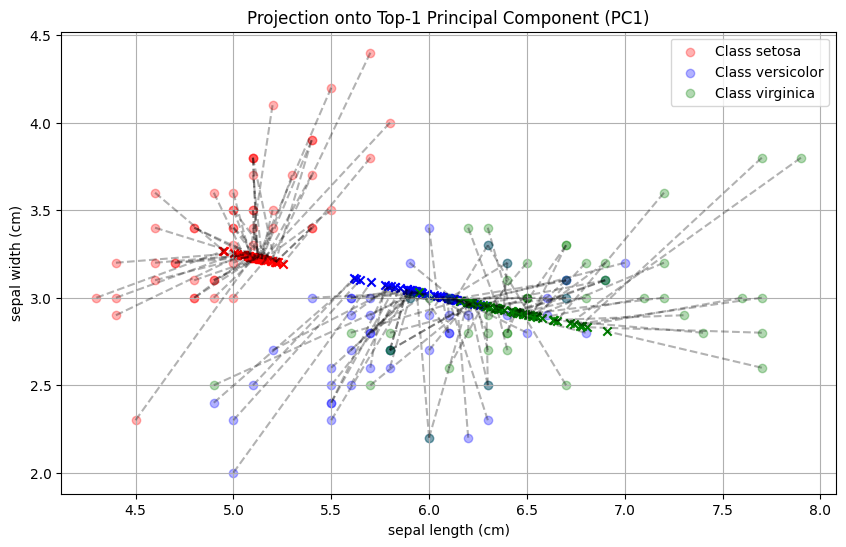

In [83]:
# --- Reconstruction using Top-1 Principal Component ---
W_1 = eigenvectors[:, 0:1] # Select the first eigenvector (Top-1 Principal Component)
projected_1d = centered_data @ W_1 @ W_1.T + mean # Reconstruct the data using the first eigenvector
# formula: X_reconstructed = X_centered * W(eigenvector) * W^T(transpose of eigenvector)+ mean 

plt.figure(figsize=(10, 6))
for i, color in enumerate(['red', 'blue', 'green']):
    mask = labels == i
    plt.scatter(data[mask, 0], data[mask, 1], color=color, alpha=0.3, label=f'Class {target_names[i]}')
    plt.scatter(projected_1d[mask, 0], projected_1d[mask, 1], color=color, marker='x')

    for j in np.where(mask)[0]:
        plt.plot([data[j, 0], projected_1d[j, 0]],
                 [data[j, 1], projected_1d[j, 1]],
                 'k--', alpha=0.3)

plt.title('Projection onto Top-1 Principal Component (PC1)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.grid(True)
plt.show()

Data points were reduced to a single dimension and then mapped back into the 2D space, forming a linear alignment along PC1.


The X-markers are the projections of the original points onto the 1D subspace defined by PC1.

These gray dashed lines represent the distance lost when reducing the data from 2D to a 1D representation along PC1.

The longer the dashed line, the more information (variance) was lost in reducing the dataset to just the first principal component (PC1).


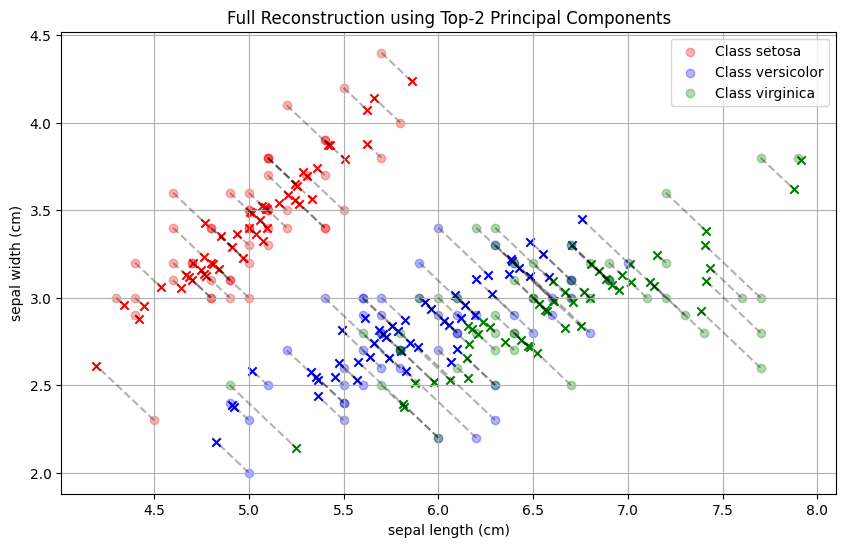

In [ ]:
# --- Full Reconstruction using Top-2 PCs ---
projected_2d = centered_data @ W @ W.T + mean

plt.figure(figsize=(10, 6))
for i, color in enumerate(['red', 'blue', 'green']):
    mask = labels == i
    plt.scatter(data[mask, 0], data[mask, 1], color=color, alpha=0.3, label=f'Class {target_names[i]}')
    plt.scatter(projected_2d[mask, 0], projected_2d[mask, 1], color=color, marker='x')

    for j in np.where(mask)[0]:
        plt.plot([data[j, 0], projected_2d[j, 0]],
                 [data[j, 1], projected_2d[j, 1]],
                 'k--', alpha=0.3)

plt.title('Full Reconstruction using Top-2 Principal Components')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.grid(True)
plt.show()


The reconstructed points are much closer to the original data points, reducing reconstruction error, in fact the data's original structure is better preserved (more meaningful information is retained)

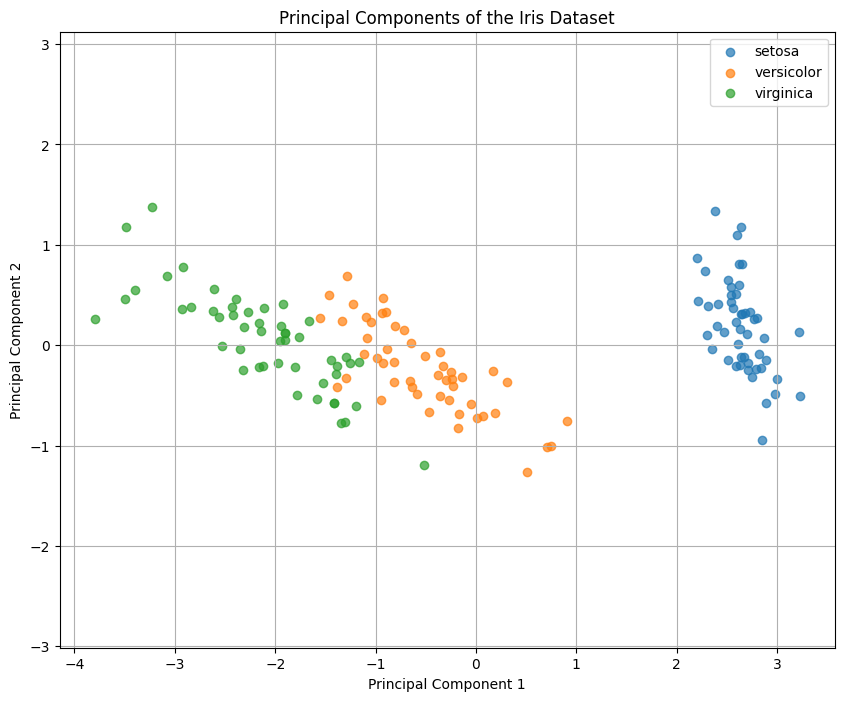

In [88]:
# Plot data points
plt.figure(figsize=(10, 8))
for i, species in enumerate(target_names):
    plt.scatter(projected_data[target == i, 0], 
                projected_data[target == i, 1], 
                label=species, alpha=0.7)

plt.title('Principal Components of the Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
